In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.externals.six import StringIO 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import make_scorer
import sklearn
from sklearn import decomposition
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import decomposition
from sklearn.model_selection import cross_val_score

# XGBoost
import xgboost as xgb

# Pandas
import pandas as pd

# Numpy
import numpy as np
# Set random seed
np.random.seed(0)

# Plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus

In [4]:
raw = pd.read_csv('KeplerData.csv')
print(raw.shape)
raw.head()

(9564, 102)


,loc_rowid,KepID,Exoplanet Archive Disposition,Disposition Using Kepler Data,Disposition Score,Not Transit-Like False Positive Flag,Stellar Eclipse False Positive Flag,Centroid Offset False Positive Flag,Ephermeris Match Indicates Contamination False Positive Flag,Orbital Period [days],...,PRF Delta Delta SQ (OOT) [arcsec],PRF Delta Delta SQ (OOT) Unc.,PRF Delta Theta SQ (OOT) [arcsec],PRF Delta Theta SQ (OOT) Unc.,PRF Delta Alpha SQ (KIC) [arcsec],PRF Delta Alpha SQ (KIC) Unc.,PRF Delta Delta SQ (KIC) [arcsec],PRF Delta Delta SQ (KIC) Unc.,PRF Delta Theta SQ (KIC) [arcsec],PRF Delta Theta SQ (KIC) Unc.
0,1,10797460,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [6]:
target_name = 'Exoplanet Archive Disposition'
feature_names = list(raw.columns[4:])
data = raw[[target_name, *feature_names]]
# remove canidates for prediction (2244 rows)
data = raw[raw[target_name] != 'CANDIDATE']
# IMPUTE
# Fill Disposition Score with 0.5
data['Disposition Score'].fillna(.5, inplace=True)
# Fill flags with 0
flag_names = ['Not Transit-Like False Positive Flag', 'Stellar Eclipse False Positive Flag', 'Centroid Offset False Positive Flag', 'Ephermeris Match Indicates Contamination False Positive Flag']
data[flag_names].fillna(0, inplace=True)
# Fill all other nulls with median
data.fillna(data.median(), inplace=True)
print(data.shape)
data.head()

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(7320, 102)


,loc_rowid,KepID,Exoplanet Archive Disposition,Disposition Using Kepler Data,Disposition Score,Not Transit-Like False Positive Flag,Stellar Eclipse False Positive Flag,Centroid Offset False Positive Flag,Ephermeris Match Indicates Contamination False Positive Flag,Orbital Period [days],...,PRF Delta Delta SQ (OOT) [arcsec],PRF Delta Delta SQ (OOT) Unc.,PRF Delta Theta SQ (OOT) [arcsec],PRF Delta Theta SQ (OOT) Unc.,PRF Delta Alpha SQ (KIC) [arcsec],PRF Delta Alpha SQ (KIC) Unc.,PRF Delta Delta SQ (KIC) [arcsec],PRF Delta Delta SQ (KIC) Unc.,PRF Delta Theta SQ (KIC) [arcsec],PRF Delta Theta SQ (KIC) Unc.
0,1,10797460,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,...,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,...,0.000,0.480,0.390,0.360,0.490,0.340,0.120,0.730,0.500,0.450
2,3,10811496,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,19.899140,...,-0.034,0.070,0.042,0.072,0.002,0.071,-0.027,0.074,0.027,0.074
3,4,10848459,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,1.736952,...,0.147,0.078,0.289,0.079,-0.257,0.072,0.099,0.077,0.276,0.076
4,5,10854555,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,...,-0.090,0.180,0.100,0.140,0.070,0.180,0.020,0.160,0.070,0.200


In [47]:
X_train, X_test, y_train, y_test = \
    train_test_split(data[feature_names], data[target_name], test_size=.4, random_state=42)

In [48]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

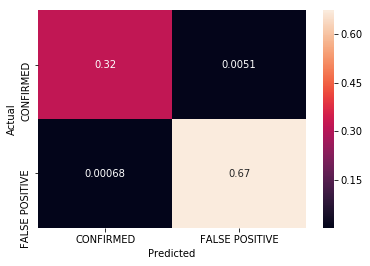

In [49]:
confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], normalize=True)
sns.heatmap(confusion, annot=True)

In [50]:
values = list(zip(data[feature_names], clf.feature_importances_))
#plt.barh(range(len(clf.feature_importances_)), [x[1] for x in values])
sortd = sorted(values, reverse = True, key= lambda x: x[1])[:20]
important_names = [s[0] for s in sortd]
sortd

[('Disposition Score', 0.3191938975699221),
 ('Stellar Effective Temperature Upper Uncertainty [K]', 0.07378909148501506),
 ('Stellar Effective Temperature Lower Uncertainty [K]', 0.049582408296496946),
 ('PRF Delta Theta SQ (OOT) [arcsec]', 0.04355014111593481),
 ('Planetary Radius [Earth radii].1', 0.035327501172819506),
 ('Transit Duration Upper Uncertainty [hrs]', 0.030674031069419856),
 ('Stellar Metallicity Upper Uncertainty [dex]', 0.029018013372182305),
 ('Stellar Mass Lower Uncertainty [Solar mass]', 0.028111663881171457),
 ('FW Source Delta Alpha (OOT) Unc.', 0.02669362568113597),
 ('Centroid Offset False Positive Flag', 0.025877594109065465),
 ('PRF Delta Theta SQ (KIC) [arcsec]', 0.02547419974948898),
 ('Planetary Radius Lower Unc. [Earth radii]', 0.02265802859052175),
 ('Stellar Eclipse False Positive Flag', 0.01981018485342157),
 ('FW Source Alpha (OOT) Unc. ', 0.019285406204096644),
 ('Transit Depth Upper Uncertainty [ppm]', 0.018009537586365844),
 ('Stellar Radius Upper

In [26]:
# A quick look at the count of null values in the original data
important_withnulls = raw[[*important_names, target_name]]
important_withnulls.describe()

,Disposition Score,Stellar Metallicity Lower Uncertainty [dex],FW Offset Significance [percent],Planetary Radius [Earth radii].1,Not Transit-Like False Positive Flag,PRF Delta Theta SQ (OOT) [arcsec],Transit Duration Lower Uncertainty [hrs],PRF Delta Theta SQ (KIC) [arcsec],Stellar Effective Temperature Lower Uncertainty [K],Planetary Radius Lower Unc. [Earth radii],Centroid Offset False Positive Flag,Stellar Mass Upper Uncertainty [Solar mass],Number of Planets,Planet-Star Distance over Star Radius,Planetary Radius Upper Unc. [Earth radii],Planetary Radius [Earth radii],Transit Depth Lower Uncertainty [ppm],Insolation Flux [Earth flux],Transit Signal-to-Noise,FW delta-Alpha Unc.
count,8054.000000,9177.000000,8488.000000,9201.000000,9564.000000,8965.000000,9110.000000,8994.000000,9081.000000,9201.000000,9564.000000,9096.000000,9564.000000,9201.000000,9201.000000,9201.000000,9110.000000,9.243000e+03,9201.000000,9109.000000
mean,0.480829,-0.252033,0.150994,102.891778,0.188206,1.866561,-0.339942,1.812566,-162.265059,-33.023314,0.194898,0.122801,1.406315,76.736333,17.657684,0.283646,-123.197563,7.745737e+03,259.895001,0.703913
std,0.476928,0.085453,0.252648,3077.639126,0.390897,2.988742,0.669823,2.986376,72.746348,1193.519910,0.396143,0.085946,0.873289,845.274598,391.138501,3.306558,4112.615230,1.592047e+05,795.806615,0.663513
min,0.000000,-0.750000,0.000000,0.080000,0.000000,0.000000,-20.200000,0.000000,-1762.000000,-77180.000000,0.000000,0.000000,1.000000,0.373000,0.000000,0.001289,-388600.000000,0.000000e+00,0.000000,0.000140
25%,0.000000,-0.300000,0.000000,1.400000,0.000000,0.170000,-0.350000,0.210000,-198.000000,-1.940000,0.000000,0.072000,1.000000,5.358000,0.230000,0.012341,-49.500000,2.015000e+01,12.000000,0.170000
50%,0.334000,-0.300000,0.006000,2.390000,0.000000,0.610000,-0.142000,0.583000,-160.000000,-0.300000,0.000000,0.106000,1.000000,15.460000,0.520000,0.021076,-20.750000,1.416000e+02,23.000000,0.570000
75%,0.998000,-0.150000,0.196250,14.930000,0.000000,2.160000,-0.050800,1.970000,-114.000000,-0.140000,0.000000,0.151000,1.000000,45.370000,2.320000,0.095348,-9.600000,8.702900e+02,78.000000,1.100000
max,1.000000,0.000000,1.000000,200346.000000,1.000000,88.600000,0.000000,89.600000,0.000000,0.000000,1.000000,1.500000,7.000000,79614.000000,21640.000000,99.870651,0.000000,1.094755e+07,9054.700000,11.000000


In [27]:
important_withnulls.isnull().sum()

Disposition Score                                      1510
Stellar Metallicity Lower Uncertainty [dex]             387
FW Offset Significance [percent]                       1076
Planetary Radius [Earth radii].1                        363
Not Transit-Like False Positive Flag                      0
PRF Delta Theta SQ (OOT) [arcsec]                       599
Transit Duration Lower Uncertainty [hrs]                454
PRF Delta Theta SQ (KIC) [arcsec]                       570
Stellar Effective Temperature Lower Uncertainty [K]     483
Planetary Radius Lower Unc. [Earth radii]               363
Centroid Offset False Positive Flag                       0
Stellar Mass Upper Uncertainty [Solar mass]             468
Number of Planets                                         0
Planet-Star Distance over Star Radius                   363
Planetary Radius Upper Unc. [Earth radii]               363
Planetary Radius [Earth radii]                          363
Transit Depth Lower Uncertainty [ppm]   

Disposition Score                           \
                                          count      mean       std  min   
Exoplanet Archive Disposition                                              
CONFIRMED                                2297.0  0.960214  0.147813  0.0   
FALSE POSITIVE                           5023.0  0.116014  0.204737  0.0   

                                                         
                                 25%  50%    75%    max  
Exoplanet Archive Disposition                            
CONFIRMED                      0.992  1.0  1.000  1.000  
FALSE POSITIVE                 0.000  0.0  0.103  0.957

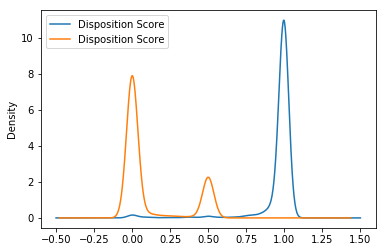

In [51]:
# here we look at the most important feature
fig, axs = plt.subplots(ncols=1)
koi_score = data[['Disposition Score', target_name]]
koi_score.groupby(data[target_name]).plot(kind='kde', ax=axs)
koi_score.groupby(data[target_name]).describe()

<Figure size 2160x2160 with 0 Axes>

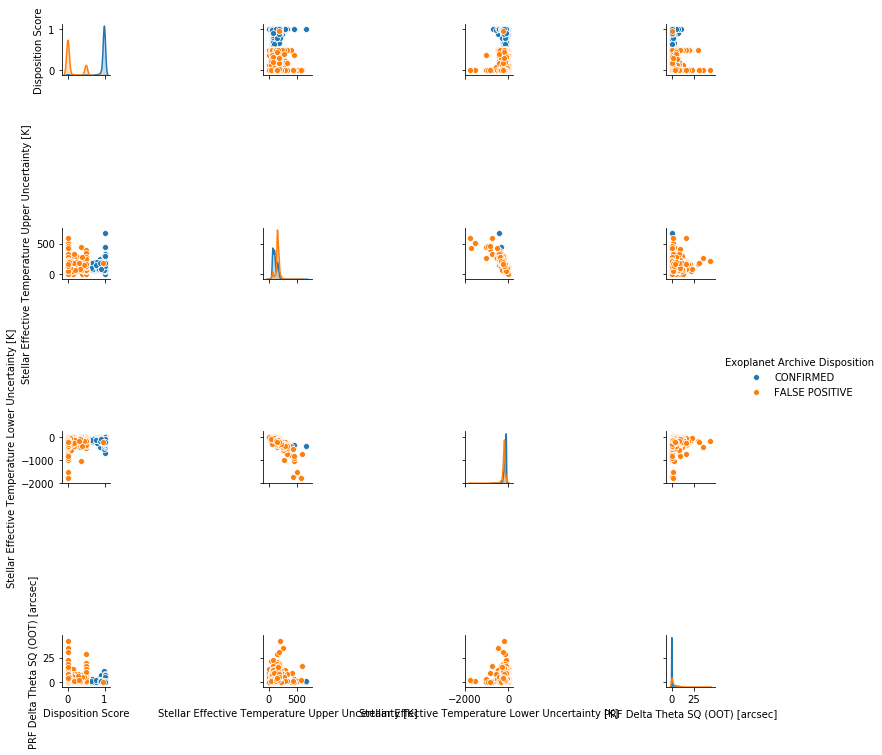

In [54]:
plt.figure(figsize=(30,30))
sns.pairplot(data[[*important_names[:4], target_name]], hue=target_name)

Accuracy:		 0.9913920397857356
Completeness:		 0.9913920397857356
Contamination:		 0.008607960214264354


{'fit_time': array([0.07936573, 0.08144903, 0.09150696, 0.09299779, 0.07838488]),
 'score_time': array([0.02761507, 0.02736807, 0.03112125, 0.02975321, 0.02769613]),
 'test_accuracy': array([0.99249147, 0.99590444, 0.99043716, 0.99179768, 0.98632946]),
 'train_accuracy': array([0.99948762, 0.99948762, 0.99965847, 0.99931706, 0.99948779]),
 'test_precision': array([0.99249147, 0.99590444, 0.99043716, 0.99179768, 0.98632946]),
 'train_precision': array([0.99948762, 0.99948762, 0.99965847, 0.99931706, 0.99948779]),
 'test_recall': array([0.99249147, 0.99590444, 0.99043716, 0.99179768, 0.98632946]),
 'train_recall': array([0.99948762, 0.99948762, 0.99965847, 0.99931706, 0.99948779])}

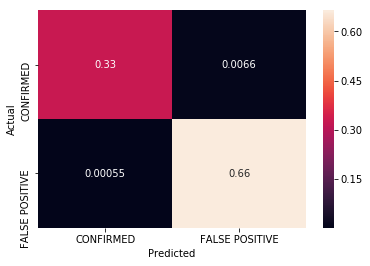

In [64]:
# Rerun using only the top most important features
important = data[[*important_names, target_name]]
train, test = sklearn.model_selection.train_test_split(important)
y_train = train[target_name]
X_train = train[important_names]
y_test = test[target_name]
X_test = test[important_names]
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confusion = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], normalize=True)
sns.heatmap(confusion, annot=True)
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_micro',
           'recall': 'recall_micro'}
scores = cross_validate(clf, data[important_names], data[target_name], scoring=scoring,
                         cv=5, return_train_score=True)

print("Accuracy:\t\t", np.mean(scores['test_accuracy']))
print("Completeness:\t\t", np.mean(scores['test_recall']))
print("Contamination:\t\t", 1 - np.mean(scores['test_precision']))
scores

In [ ]:
names = ["Nearest Neighbors", #"RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    #SVC(kernel="linear", C=0.025),
    #SVC(gamma=2, C=1),
    #GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [67]:
scoring = ['accuracy', 'precision', 'recall']
# iterate over classifiers
for name, clf in zip(names, classifiers):
    scores = cross_validate(clf, data[important_names],
                            data[target_name]=='CONFIRMED', scoring=scoring,
                            cv=5, return_train_score=True)
    print(name)
    print("Accuracy:\t\t", np.mean(scores['test_accuracy']))
    print("Completeness:\t\t", np.mean(scores['test_recall']))
    print("Contamination:\t\t", 1 - np.mean(scores['test_precision']))
    print('\n')

Nearest Neighbors
Accuracy:		 0.8892127396613434
Completeness:		 0.8671942786776545
Contamination:		 0.19828655687682506




/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarnin

RBF SVM
Accuracy:		 0.6862022552681353
Completeness:		 0.0
Contamination:		 1.0


Decision Tree
Accuracy:		 0.9871576254639948
Completeness:		 0.974304253102207
Contamination:		 0.015316298263923556


Random Forest
Accuracy:		 0.9708953757516274
Completeness:		 0.9276991569574691
Contamination:		 0.021576760928570415


Neural Net
Accuracy:		 0.9631135289661824
Completeness:		 0.9364222790565501
Contamination:		 0.050336686699748334


AdaBoost
Accuracy:		 0.989889960171508
Completeness:		 0.9782220327744625
Contamination:		 0.010377048681892154


Naive Bayes
Accuracy:		 0.8900402582219907
Completeness:		 0.9847589277256796
Contamination:		 0.24539188233036346


QDA
Accuracy:		 0.9756835192231277
Completeness:		 0.9599441129108648
Contamination:		 0.03551021073097471




In [21]:
# Getting wwarning Variables are collinear
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

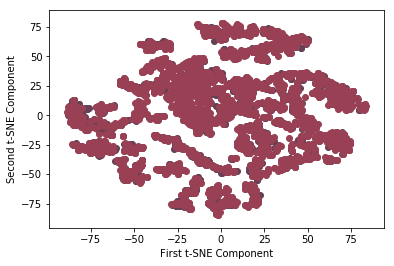

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(2, random_state=42)
X_tsne = tsne.fit_transform(data[important_names])

data_tsne = pd.DataFrame(X_tsne)
data_tsne[target_name] = data[target_name]

n = 1
for (category, row) in data_tsne.groupby(by=target_name):
    n = n + 1
    plt.scatter(row[0], row[1], color = (n*0.2, 0.25, 0.33, 1))

#plt.legend(data_tsne["category"].unique())
plt.xlabel("First t-SNE Component")
plt.ylabel("Second t-SNE Component")
plt.show()

Logistic:
	Brier: 0.250
	Precision: 0.000
	Recall: 0.000
	F1: 0.000

Naive Bayes:
	Brier: 0.216
	Precision: 0.000
	Recall: 0.000
	F1: 0.000

Naive Bayes + Isotonic:
	Brier: 0.240
	Precision: 0.336
	Recall: 0.825
	F1: 0.478



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes + Sigmoid:
	Brier: 0.214
	Precision: 0.000
	Recall: 0.000
	F1: 0.000

Logistic:
	Brier: 0.250
	Precision: 0.000
	Recall: 0.000
	F1: 0.000

SVC:
	Brier: 0.586
	Precision: 0.314
	Recall: 1.000
	F1: 0.478



/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC + Isotonic:
	Brier: 0.235
	Precision: 0.206
	Recall: 0.116
	F1: 0.149

SVC + Sigmoid:
	Brier: 0.214
	Precision: 0.000
	Recall: 0.000
	F1: 0.000



/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:445: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:447: RuntimeWarning: invalid value encountered in multiply
  TEP_minus_T1P = P * (T * E - T1)
/usr/local/lib/python3.7/site-packages/sklearn/calibration.py:435: RuntimeWarning: overflow encountered in exp
  E = np.exp(AB[0] * F + AB[1])
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision',

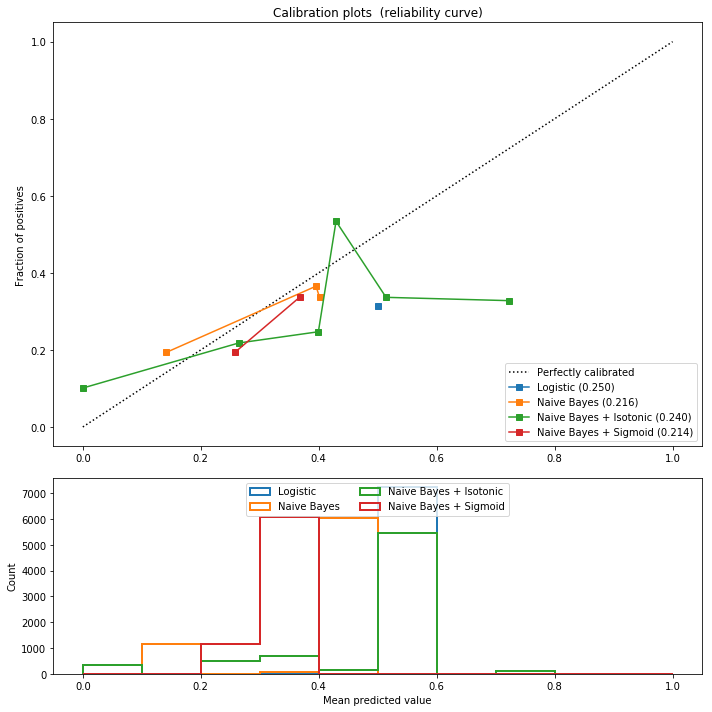

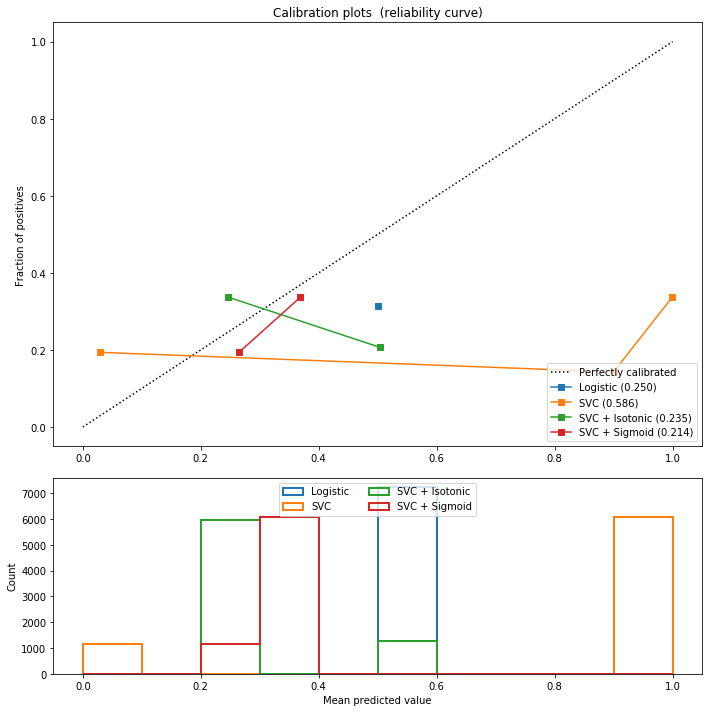

In [70]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (brier_score_loss, precision_score, recall_score,
                             f1_score)
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.model_selection import train_test_split


# Create dataset of classification task with many redundant and few
# informative features
X, y = data[feature_names], data[target_name]=='CONFIRMED'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99,
                                                    random_state=42)


def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1., solver='lbfgs')

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()

# Plot calibration curve for Gaussian Naive Bayes
plot_calibration_curve(GaussianNB(), "Naive Bayes", 1)

# Plot calibration curve for Linear SVC
plot_calibration_curve(LinearSVC(), "SVC", 2)

plt.show()